https://stackoverflow.com/questions/77669310/double-exponential-fit-in-python

In [1]:
import numpy as np
import numdifftools as nd
import matplotlib.pyplot as plt
from scipy import optimize, integrate
from sklearn.metrics import r2_score

In [2]:
def logistic(x, a, b):
    return 1. / (1. + np.exp(a * (x - b)))

In [3]:
def model(x, a, b, c, p, r, q, s):
    return a + b * logistic(x, p, r) - c * logistic(x, q, s)

In [4]:
#model = nd.Derivative(model)

In [5]:
p0 = [2, 1, 0.5, 1, 8, 1, 12]

In [6]:
np.random.seed(12345)
t = np.linspace(0, 20, 50)
x = model(t, *p0)
s = 0.01 * np.ones_like(x)
n = s * np.random.normal(size=x.size)
x += n

In [7]:
popt, pcov = optimize.curve_fit(model, t, x, sigma=s, p0=[1, 1, 1, 1, 5, 1, 10], absolute_sigma=True)
popt, pcov

(array([ 1.99857748,  1.05785034,  0.55096438,  0.96328697,  8.07207129,
         0.88238919, 11.83807625]),
 array([[ 1.26520983e-05,  9.45099354e-05,  1.06310403e-04,
         -3.20086138e-05,  1.15865264e-04, -1.48216926e-04,
         -2.85838214e-04],
        [ 9.45099354e-05,  4.56888485e-03,  4.57549150e-03,
         -2.24530047e-03,  6.57861333e-03, -4.03797079e-03,
         -1.52089119e-02],
        [ 1.06310403e-04,  4.57549150e-03,  4.60430584e-03,
         -2.20658489e-03,  6.59511014e-03, -4.14085828e-03,
         -1.52702808e-02],
        [-3.20086138e-05, -2.24530047e-03, -2.20658489e-03,
          1.49330410e-03, -3.37136658e-03,  1.54210592e-03,
          6.82611197e-03],
        [ 1.15865264e-04,  6.57861333e-03,  6.59511014e-03,
         -3.37136658e-03,  1.00989310e-02, -5.31659959e-03,
         -2.15999081e-02],
        [-1.48216926e-04, -4.03797079e-03, -4.14085828e-03,
          1.54210592e-03, -5.31659959e-03,  4.93174330e-03,
          1.41160323e-02],
        [

In [8]:
xhat = model(t, *popt)
score = r2_score(x, xhat)
score

0.9987856595839526

In [9]:
tlin = np.linspace(t.min(), t.max(), 200)
xlin = model(tlin, *popt)

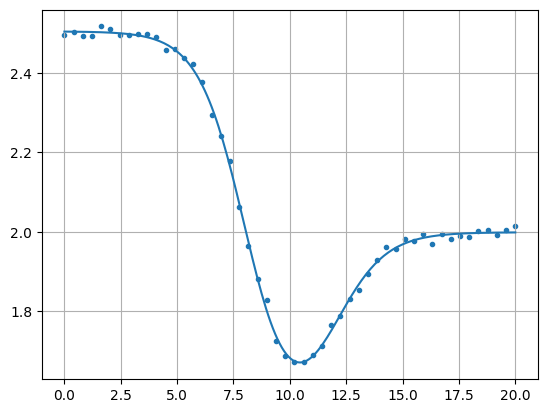

In [10]:
fig, axe = plt.subplots()
axe.scatter(t, x, marker=".")
axe.plot(tlin, xlin)
axe.grid()